In [1]:
# Адаптируем размер тетрадки
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

<a id='31-bullet'></a>
## Название проэкта: 
<b> Принятие решений в бизнесе </b>
    
## Цель проекта: 
<b>Приоритизация гипотез, запуск A/B-теста и анализ результатов. </b>


## Описание проекта:
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

    
## Описание данных:

Данные для первой части:

Файл /datasets/hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части: 

Файл /datasets/orders.csv. Скачать датасет
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Данное исследование разделим на несколько частей:

##### [Часть 1. Изучение общей информации:](#1-bullet)
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

##### [Часть 2. Подготка данных:](#2-bullet)


##### [Часть 3. Приоритизация гипотез:](#3-bullet)
* [1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.](#4-bullet)
* [2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.](#5-bullet)
* [3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.](#7-bullet)



##### [Часть 4. Анализ A/B-теста:](#11-bullet)
* [1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.](#12-bullet)
* [2 Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.](#13-bullet)
* [3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.](#14-bullet)
* [4 Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.](#15-bullet)
* [5 Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.](#16-bullet)
* [6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.](#17-bullet)
* [7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.](#18-bullet)
* [8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.](#19-bullet)
* [9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.](#20-bullet)
* [10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.](#21-bullet)
* [11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.](#22-bullet)
* [12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.](#23-bullet)
* [13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.](#24-bullet)
* [14. Примем решение по результатам теста и объясните его. Варианты решений:](#25-bullet) 
    * 1. Остановить тест, зафиксировать победу одной из групп. 
    * 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    * 3. Продолжить тест.

##### [Часть 7. Выводы](#30-bullet)
    


<a id='1-bullet'></a>
# Изучение общей информации:

In [2]:
import pandas as pd
import matplotlib as mlt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import scipy.stats as stats

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('orders.csv')
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('visitors.csv')

In [4]:
display(hypothesis.head(), hypothesis.info(), 
        orders.head(), orders.info(), 
        visitors.head(), visitors.info()
       )
print('Пропуски:')
display(hypothesis.duplicated().sum(),
       orders.duplicated().sum(),
       visitors.duplicated().sum()
       )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


None

Пропуски:


0

0

0

<b> Вывод:
Имеем 3 базы данных:
* В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
* В файле orders.csv и visitors.csv описаны результаты проведенного A/B теста.

<b>
В данных нет проблем с пропусками или дубликатами, но все столбцы начинаются с заглавных, а даты имеют не правильный тип данных.


<a id='2-bullet'></a>
# Подготка данных:

In [5]:
# Проверим наличие пересекающихся пользователей в группах

orders_twinsA = orders[orders['group'] == 'A']
orders_twinsB = orders[orders['group'] == 'B']
twins_id = pd.DataFrame(orders_twinsA[orders_twinsA['visitorId'].isin(orders_twinsB['visitorId'])])
twins_id = twins_id.drop('group', axis=1).drop_duplicates().reset_index(drop=True)
print('количество пересекающихся пользователей в группах:', twins_id['visitorId'].count())

количество пересекающихся пользователей в группах: 89


In [6]:
# удалим пересекающихся пользователей
orders = orders[~orders['visitorId'].isin(twins_id['visitorId'])]

# Приведем столбцы к нижнему регистру:
hypothesis.columns = hypothesis.columns.str.lower()


# Преобразование данных о времени:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# Для лучшей читаемости переименуем столбцы:
orders = orders.rename(columns={ 'transactionId' : 'transaction_id', 
                                'visitorId' : 'visitor_id'})
# Частично снимем ограничения на показ значении в таблицах:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

# Проверим:
display(hypothesis.head(), hypothesis.info(), 
        orders.head(), orders.info(), 
        visitors.head(), visitors.info()
       )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB
<class 'pandas.core.frame

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


None

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


None

<a id='3-bullet'></a>
# Приоритизация гипотез:

<a id='4-bullet'></a>
## Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis' , 'ice']].sort_values(by = 'ice', ascending = False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


<b>
При применении фреймворка для приоритизации гипотез ICE, лидируют гипотезы 8,0 и 7

<a id='5-bullet'></a>
## Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis' , 'rice']].sort_values(by = 'rice', ascending = False))

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


<b>
При применении фреймворка для приоритизации гипотез RICE, лидируют гипотезы 7,2 и 0

<a id='7-bullet'></a>
## Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

<b>
Фреймворк RICE дает более точну оценку приоритета так как учитывает не только силу гипотезы но и принимает во внимание охват, из-за чего, при его приминении, лидируют гипотезы 7,2 и 0.

<a id='11-bullet'></a>
# Анализ A/B-теста:

<a id='12-bullet'></a>
## 1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


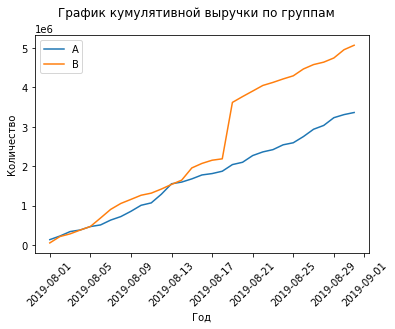

In [9]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np
                                            .logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.suptitle("График кумулятивной выручки по группам")
plt.ylabel('Количество')
plt.xlabel('Год')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

<b> Вывод:
В середине теста сегмент B резко отрываеися от сегмента A. Возможной причиной могут быть аномально большие заказы.

<a id='13-bullet'></a>
## 2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

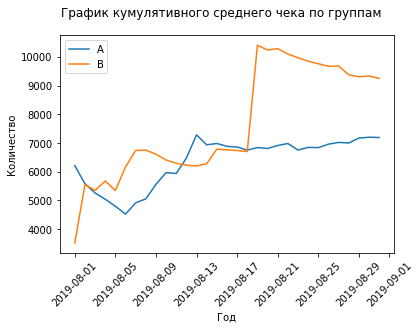

In [10]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.suptitle("График кумулятивного среднего чека по группам")
plt.ylabel('Количество')
plt.xlabel('Год')
plt.xticks(rotation = 45)
plt.show()

<b> Вывод:
В середине теста сегмент B резко отрываеися от сегмента A. Возможной причиной могут быть аномально большие заказы.

<a id='14-bullet'></a>
## 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

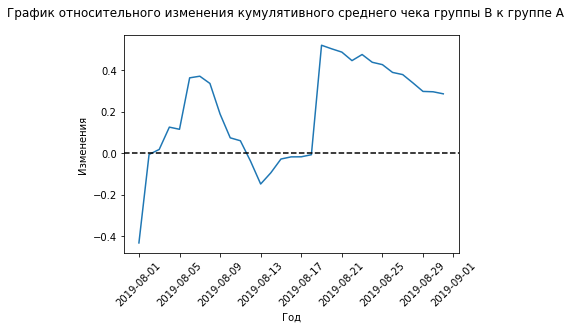

In [11]:
# собираем данные изменения кумулятивного среднего чека в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.suptitle("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel('Изменения')
plt.xlabel('Год')
plt.xticks(rotation = 45)
plt.show()

<b> Вывод:
Результаты теста значительно менялись в нескольких датах. Возможно это даты аномальных заказов.

<a id='15-bullet'></a>
## 4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

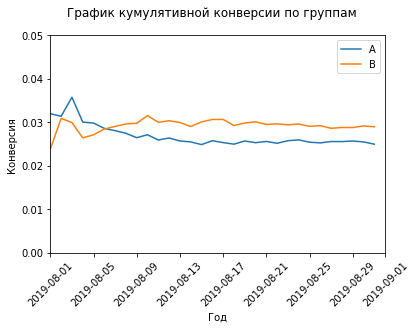

In [12]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([datetime(2019, 8, 1), datetime(2019, 9, 1), 0, 0.05])

plt.suptitle("График кумулятивной конверсии по группам")
plt.ylabel('Конверсия')
plt.xlabel('Год')
plt.xticks(rotation = 45)
plt.show()

<b> Вывод:
В начале теста сегмент A имел большую конверсию, однако сегмент В превзошел его и зафиксировался выше сегмента А

<a id='16-bullet'></a>
## 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

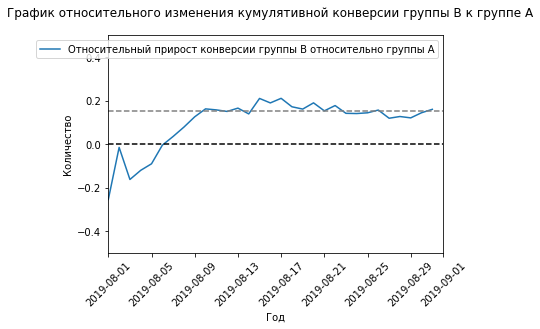

In [13]:
# собираем данные изменения кумулятивной конверсии в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', 
                                                                           suffixes=['A', 'B'])

# cтроим отношение конверсии
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([datetime(2019, 8, 1), datetime(2019, 9, 1), -0.5, 0.5])

plt.suptitle("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.ylabel('Количество')
plt.xlabel('Год')
plt.xticks(rotation = 45)
plt.show()

<b> Вывод:
Почти с самого начала группа B лидирует по конверсии относительно группы A на 15%. Вероятно аномальные заказы в группе В могли повлиять на результат.

<a id='17-bullet'></a>
## 6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3


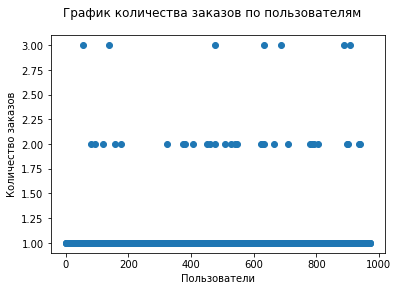

In [14]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head())

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values , ordersByUsers['orders'])
plt.suptitle("График количества заказов по пользователям")
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

<b> Вывод:
Пользователей которые заказали больше 2х раз очень мало. Их можно считать аномальными.

<a id='18-bullet'></a>
## 8. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [15]:
np.percentile(ordersByUsers['orders'],[ 90, 95, 99])

array([1., 1., 2.])

<b> Вывод:
* Только 10% пользователей заказали больше 1 раза.
* Только 5% пользователей заказали больше 1 раз. 
* Только 1% пользователей заказали больше 2 раз. 

<a id='19-bullet'></a>
## Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

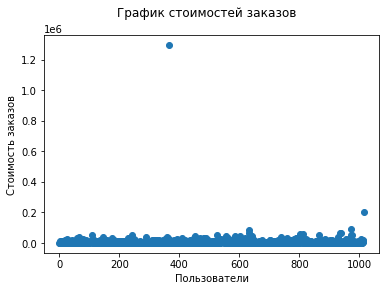

In [16]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter( x_values, orders['revenue'])
plt.suptitle("График стоимостей заказов")
plt.ylabel('Стоимость заказов')
plt.xlabel('Пользователи')
plt.show()

<b> Вывод:
Есть выбросы в районе 200 000 и 1 300 000. Возможно они и повлияли на результат.

<a id='20-bullet'></a>
## Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.

In [17]:
np.percentile(orders['revenue'], [ 90 , 95 , 99])

array([17990., 26785., 53904.])

<b> Вывод:
* Только 10% пользователей заказали на сумму больше 17 990.
* Только 5% пользователей заказали на сумму больше 26 785.
* Только 1% пользователей заказали на сумму больше 53 904.

<a id='21-bullet'></a>
## Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

<b> Для проверки статистической значимости выбрал тест Манна-Уитни так как в выборки присутствуют выбросы.

### Сформулируем гипотезы: 
* Нулевая: различий в конверсии между группами нет. 
* Альтернативная: различия в конверсии между группами есть.

In [20]:
# Вычислим количество заказов на покупателя в каждой группе
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

# добавим 0 заказов всем посетителям, которые ничего не купили
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
p_value = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]

print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]))
print("Средний относительный прирост группы B к группе A: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.01102
Средний относительный прирост группы B к группе A: 0.160
Отвергаем нулевую гипотезу


<b> Вывод:
P-value меньше 0.05. Значит, есть причины отвергнуть нулевую гипотезу и считать, что есть различия в конверсии между группами. 

<a id='22-bullet'></a>
## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

### Сформулируем гипотезы: 
* Нулевая: различий в среднем чеке между группами нет. 
* Альтернативная: различий в среднем чеке между группами есть.

In [ ]:
# считаем статистическую значимость различий в среднем чеке
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]

print('P-value = ', round(p_value,3))

print('Относительный прирост группы B к группе A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)) 

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

<b> Вывод:
P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке между группами есть различия, нет.

###  Промежуточные выводы:
    
Посчитав статистическую значимость конверсии и различий в среднем чеке заказа между группами по «сырым» данным мы выявили, что есть статистически значимые различия в конверсии между группами. Нет статистически значимых различий в среднем чеке но при этом есть относительный прирост группы B к группе A в обоих случиях. Нужно очистить данные и проверить гипотезы снова.

<a id='23-bullet'></a>
## Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

### Гипотезы: 
* Нулевая: различий в конверсии между группами нет. 
* Альтернативная: различия в конверсии между группами есть.

In [ ]:
# подготовим очищенные данные
# за выбросы посчитаем пользователей выше 95ого перцентиля

ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']


ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [ ]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),
            name='orders')],axis=0,)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'], pd.Series( 0, index=np.arange( visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersB['orders']) ),
            name='orders')],axis=0,) 

p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]

print('P-value = ', round(p_value,3))
print('Относительный прирост группы B к группе A: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

<b> Вывод:
P-value меньше 0.05. Значит, есть причины отвергнуть нулевую гипотезу и считать, что есть различия в конверсии между группами. 

<a id='24-bullet'></a>
## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

### Гипотезы: 
* Нулевая: различий в среднем чеке между группами нет. 
* Альтернативная: различий в среднем чеке между группами есть.

In [ ]:
# считаем статистическую значимость различий в среднем чеке
p_value = stats.mannwhitneyu(orders[ 
                    np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],
            orders[ np.logical_and( orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'], alternative="two-sided")[1]


print('P-value = ', round(p_value,3))

print('Относительный прирост группы B к группе A: {0:.3f}'.format(orders[ 
    np.logical_and( orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[ np.logical_and( orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке между группами есть различия, нет.

###  Промежуточные выводы:
    
Посчитав статистическую значимость конверсии и различий в среднем чеке заказа между группами по «очищенным» данным мы выявили, есть статистически значимые различия в конверсии между группами. Нет статистически значимых различий в среднем чеке но при этом есть относительный прирост группы B к группе A в конверсии на 18 %.

<a id='25-bullet'></a>
## Примем решение по результатам теста и объясните его. Варианты решений:

Имеющиеся факты:
* Анализ очищенных данных сообщает, что между группами есть сатистически значимые различия в конверсии. 
* Относительный прирост конверсии группы В к конверсии группы А равен 18%.
* Между группами нет сатистически значимых различий в среднем чеке. 
* Относительный прирост в среднем чеке группы B к группе A равен -3%.

Исходя из фактов, рекомендую остановить тест, зафиксировав победу группы В так как на протяжении почти всего исследования группа В лидировала по всем показателям и после статистического анализа мы получили сатистически значимые различия в конверсии в в пользу данной группы.

<a id='30-bullet'></a>
# Выводы:

* [Мы применили фреймворки ICE и RICE для приоритизации гипотез и распределили их по по убыванию приоритета.](#3-bullet)
* [Указали как изменилась приоритизация гипотез при применении RICE вместо ICE.](#7-bullet)
* Построили Графики:
    * [кумулятивной выручки по группам](#12-bullet)
    * [кумулятивного среднего чека по группам](#13-bullet)
    * [относительного изменения кумулятивного среднего чека группы B к группе A](#14-bullet)
    * [кумулятивной конверсии по группам](#15-bullet)
    * [относительного изменения кумулятивной конверсии группы B к группе A](#16-bullet)
    * [точечный график количества заказов по пользователям](#17-bullet)
* [Посчитали 95-й и 99-й перцентили количества заказов на пользователя](#18-bullet)
    * Выбали границу для определения аномальных пользователей
    * Построили точечный график стоимостей заказов
    * Сделали выводы и предположения
* [Посчитали 95-й и 99-й перцентили стоимости заказов](#20-bullet)
    * Выберим границу для определения аномальных заказов.
* Посчитали:
    * [статистическую значимость различий в конверсии между группами по «сырым» данным.](#21-bullet)
    * [статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.](#22-bullet)
    * [статистическую значимость различий в конверсии между группами по «очищенным» данным.](#23-bullet)
    * [статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#24-bullet)
* [Приняли решение по результатам теста и объясните его.](#25-bullet) 

# [Вернуться к началу.](#31-bullet)